# Clasificador de mascotas

El siguiente proyecto está orientado a clasificar imagenes de perros, gatos y peces.

Primero se importa la librería [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) la cual genera lotes de datos de imágenes tensoriales con aumento de datos en tiempo real.

Además también se importa numpy


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator           #Aumentar datos y crear nuevas variaciones de datos existentes
import numpy as np                                                            #Biblioteca de operaciones matriciales

In [ ]:
`ImageDataGenerator` Estará definiendose con los siguientes parámetros

- rescale: Multiplica los datos por el valor de entrada
- rotation_range: Rango de grados, es para rotaciones aleatorias.
- width_shift_range: Rango de cambio horizontal en fracción de la dimensión total
- height_shift_range: Rango de cambio vertical en fracción de la dimensión total
- shear_range: Rango de cambio de cizallamiento (shear)
- zoom_range: Rango de zoom
- validation_split: Fracción de datos a reservar para validación

In [4]:
datagen=ImageDataGenerator(
    rescale=1./255,           # Reescala los valores de píxeles a un rango de 0 a 1
    rotation_range=10,        # Rango de rotación en grados
    width_shift_range=0.15,   # Rango de cambio horizontal en fracción de la dimensión total
    height_shift_range=0.15,  # Rango de cambio vertical en fracción de la dimensión total
    shear_range=5,            # Rango de cambio de cizallamiento (shear)
    zoom_range=[0.7,1.3],     # Rango de zoom
    validation_split=0.2      # Fracción de datos a reservar para validación
)

In [8]:
data_gen_entrenamiento=datagen.flow_from_directory("./content/DATOSENT/",
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   shuffle=True, #Baraja el conjunto de datos
                                                   subset="training")

Found 20000 images belonging to 2 classes.


In [ ]:
data_gen_pruebas=datagen.flow_from_directory("/content/PRUEBAS/",
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   shuffle=False, #Baraja el conjunto de datos
                                                   subset="validation")

Found 0 images belonging to 0 classes.


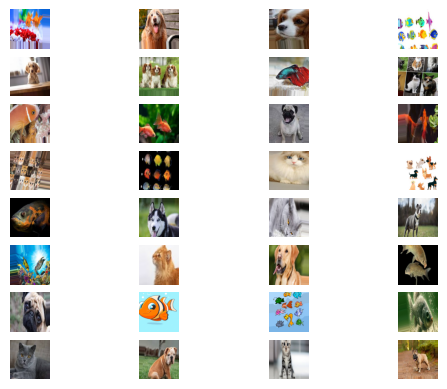

In [ ]:
import matplotlib.pyplot as plt                      #Biblioteca de gráficos

for imagenes, etiquetas in data_gen_entrenamiento:   #Muestra el primer lote de graficos
  for i in range(32):
    plt.subplot(8, 4, i+1)
    plt.imshow(imagenes[i])
    plt.axis('off')
  break
plt.show()


In [ ]:
import tensorflow as tf         #Importa TensorFlow construir y entrenar modelos de aprendizaje profundo.
import tensorflow_hub as hub    #Modelos preentrenados

In [ ]:
url="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2=hub.KerasLayer(url,input_shape=(224,224,3))

In [ ]:
#Importante
#Congelar las capas
mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(4, activation="softmax")
])

In [ ]:
modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
EPOCAS = 20
entrenamiento = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/20
13/13 [==============================] - 28s 2s/step - loss: 1.0525 - accuracy: 0.5177
Epoch 2/20
13/13 [==============================] - 23s 2s/step - loss: 0.5577 - accuracy: 0.7854
Epoch 3/20
13/13 [==============================] - 21s 2s/step - loss: 0.3726 - accuracy: 0.8687
Epoch 4/20
13/13 [==============================] - 23s 2s/step - loss: 0.3126 - accuracy: 0.8914
Epoch 5/20
13/13 [==============================] - 21s 2s/step - loss: 0.2628 - accuracy: 0.9192
Epoch 6/20
13/13 [==============================] - 23s 2s/step - loss: 0.2121 - accuracy: 0.9217
Epoch 7/20
13/13 [==============================] - 23s 2s/step - loss: 0.1836 - accuracy: 0.9571
Epoch 8/20
13/13 [==============================] - 23s 2s/step - loss: 0.1671 - accuracy: 0.9646
Epoch 9/20
13/13 [==============================] - 23s 2s/step - loss: 0.1622 - accuracy: 0.9470
Epoch 10/20
13/13 [==============================] - 25s 2s/step - loss: 0.1597 - accuracy: 0.9571
Epoch 11/20
13/13 [

In [ ]:
from PIL import Image
import cv2

def categorizar(ruta):
  img = Image.open(ruta)
  img = img.convert("RGB")
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224, 224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

for i in range(1,76):#76
  RUTA="/content/DATOSPRU/PRUEBAS/"+str(i)+".jpg"
  imagen = mpimg.imread(RUTA)
  prediccion = categorizar(RUTA)
  if prediccion==1:
    print("La prediccion es *PERROS*")
  elif prediccion == 2:
    print("La prediccion es *GATOS*")
  else:
    print("PECES")
  plt.imshow(imagen)
  plt.axis('off')  # Desactivar ejes si no son necesarios
  plt.show()